# **Credit Card Customer Segmentation(PCA+KMeans)**

About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/CC%20GENERAL.csv'

In [ ]:
df=pd.read_csv(url,sep=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.drop(columns='CUST_ID',inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace=True)
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
89,6110.265264,1.000000,0.00,0.00,0.00,2717.253917,0.000000,0.000000,0.000000,0.416667,14,0,6500.0,1502.205631,2864.380327,0.000000,12
4345,4.054657,0.727273,264.02,264.02,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,4,7000.0,274.692435,55.272081,0.111111,12
183,5.465999,0.090909,196.81,173.00,23.81,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,12000.0,0.000000,NaN,0.000000,12
4081,438.429112,1.000000,5044.36,3015.56,2028.80,0.000000,1.000000,0.416667,0.916667,0.000000,0,35,5500.0,4591.418823,186.284070,1.000000,12
291,5790.930626,1.000000,464.51,399.41,65.10,2516.727082,0.416667,0.250000,0.166667,0.166667,6,10,6000.0,1515.594331,2092.915898,0.000000,12
6016,1070.595080,1.000000,0.00,0.00,0.00,54.379041,0.000000,0.000000,0.000000,0.250000,3,0,1200.0,1513.629514,502.813712,0.083333,12
8180,763.228081,0.900000,0.00,0.00,0.00,1948.071903,0.000000,0.000000,0.000000,0.500000,48,0,1200.0,1223.745197,263.756386,0.125000,10
3392,935.367518,0.818182,2186.22,1774.12,412.10,0.000000,0.416667,0.333333,0.250000,0.000000,0,35,1700.0,3159.774947,291.825678,0.000000,12
5370,4738.804194,1.000000,0.00,0.00,0.00,3814.313134,0.000000,0.000000,0.000000,0.833333,27,0,7000.0,1374.849589,1159.813479,0.000000,12
4188,53.989299,0.857143,469.14,0.00,469.14,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1500.0,446.737399,99.058125,0.800000,7


In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## **Explorador de Datos**

In [ ]:
num=df.select_dtypes(include=['number']).columns
num

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

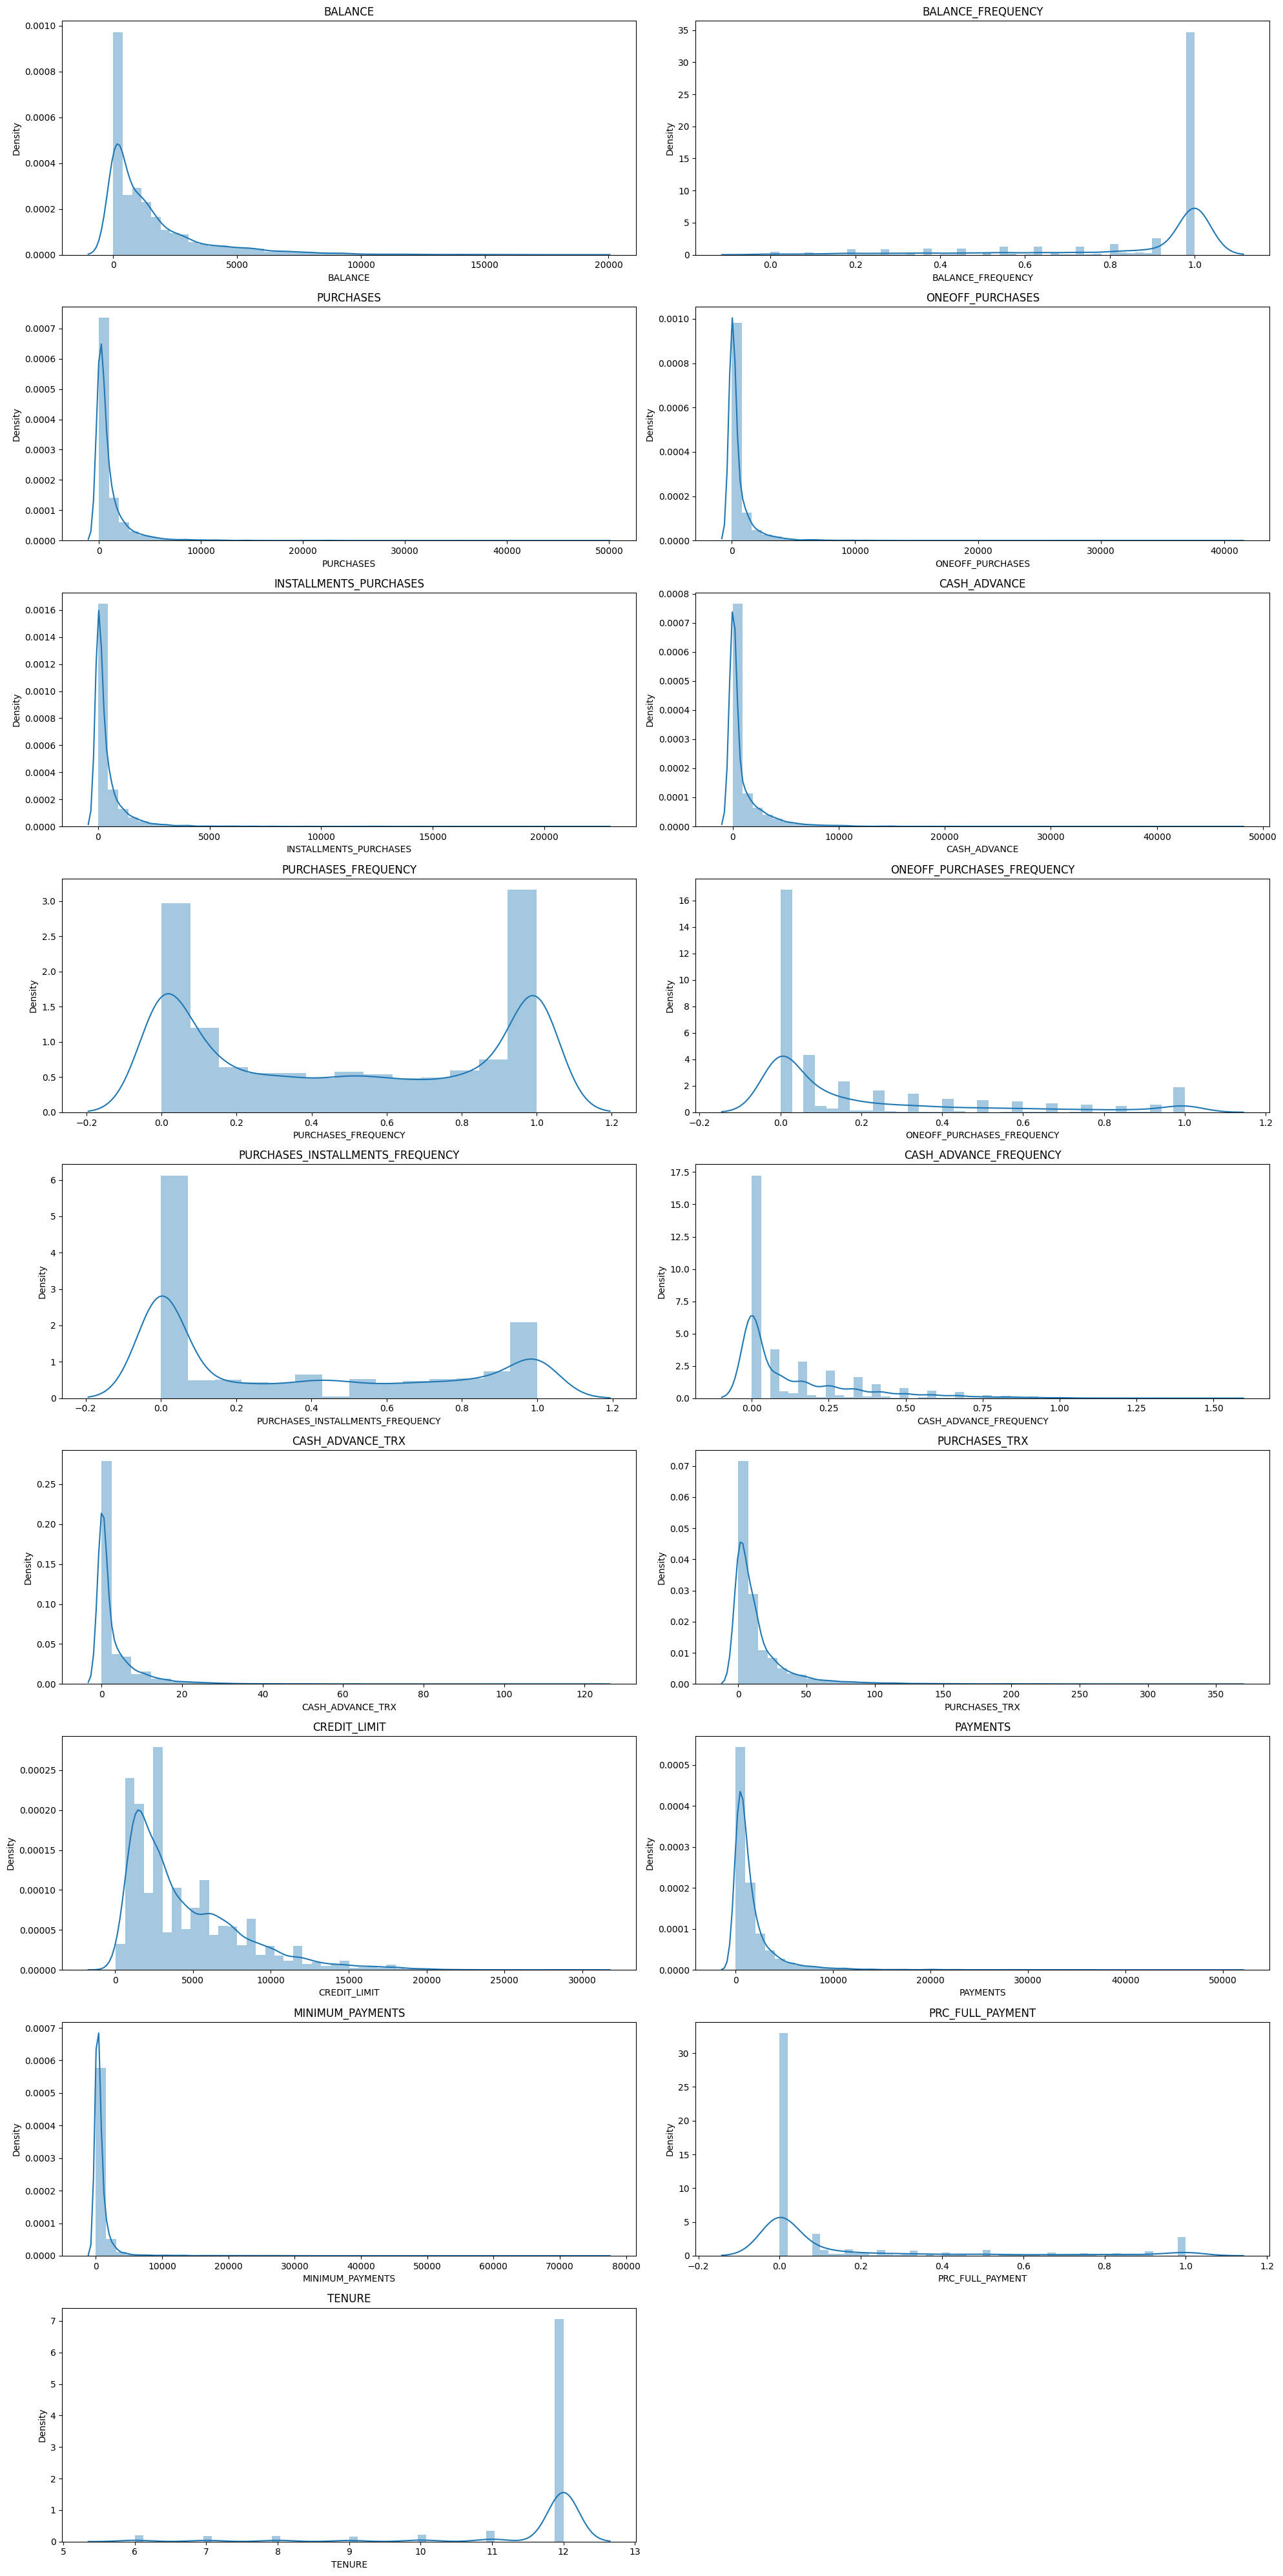

In [ ]:
x=1
plt.figure(figsize=(20,40))
for i in num:
  plt.subplot(9,2,x)
  sns.distplot(df[i])
  plt.title(i)
  x+=1
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
for col in df.columns:
    print(col)
    print({df[col].skew()})

BALANCE
{2.393270481328754}
BALANCE_FREQUENCY
{-2.0241932378008083}
PURCHASES
{8.143969328745825}
ONEOFF_PURCHASES
{10.044621791824193}
INSTALLMENTS_PURCHASES
{7.298823158100543}
CASH_ADVANCE
{5.1663234455291605}
PURCHASES_FREQUENCY
{0.0599701177816327}
ONEOFF_PURCHASES_FREQUENCY
{1.5354529638777794}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.5090232211948914}
CASH_ADVANCE_FREQUENCY
{1.8286441199006067}
CASH_ADVANCE_TRX
{5.72097632533681}
PURCHASES_TRX
{4.6304932272467205}
CREDIT_LIMIT
{1.5224640052886198}
PAYMENTS
{5.90746501386916}
MINIMUM_PAYMENTS
{13.851863625728104}
PRC_FULL_PAYMENT
{1.9426413977925}
TENURE
{-2.9447877484535407}


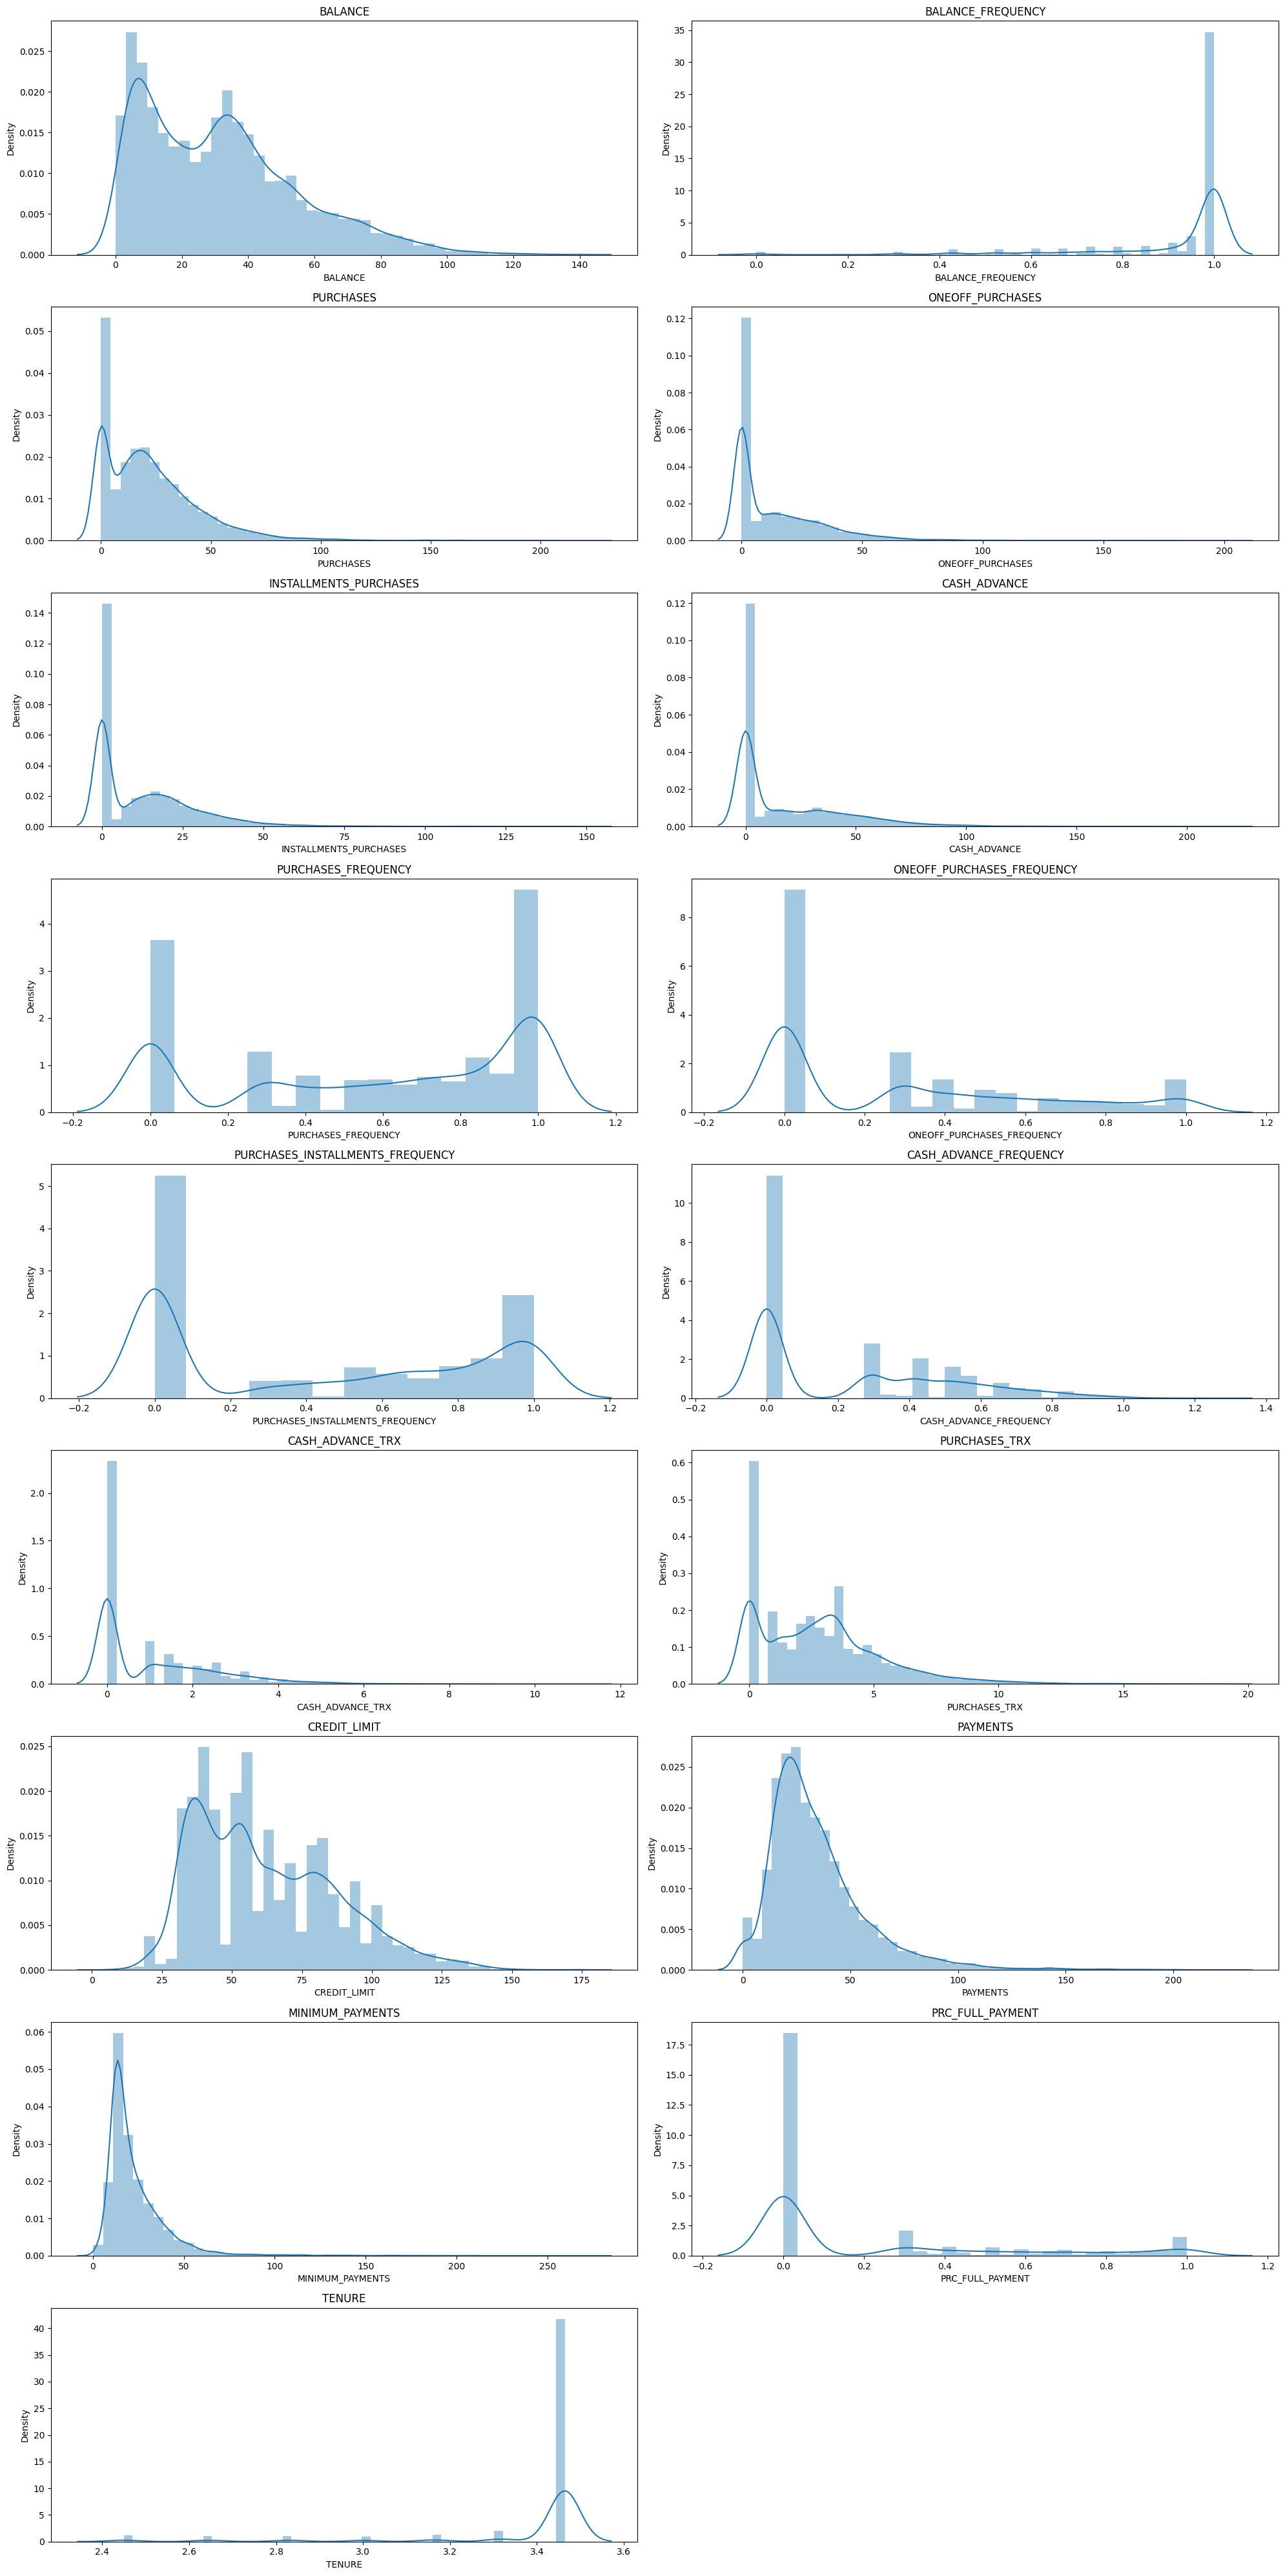

In [ ]:
x=1
plt.figure(figsize=(20,40))
for i in num:
  plt.subplot(9,2,x)
  df[i]=np.sqrt(df[i])
  sns.distplot(df[i])
  plt.title(i)
  x+=1
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.0,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.0,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.0,1.000000,86.602540,0.000000,17.676320,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.0,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102


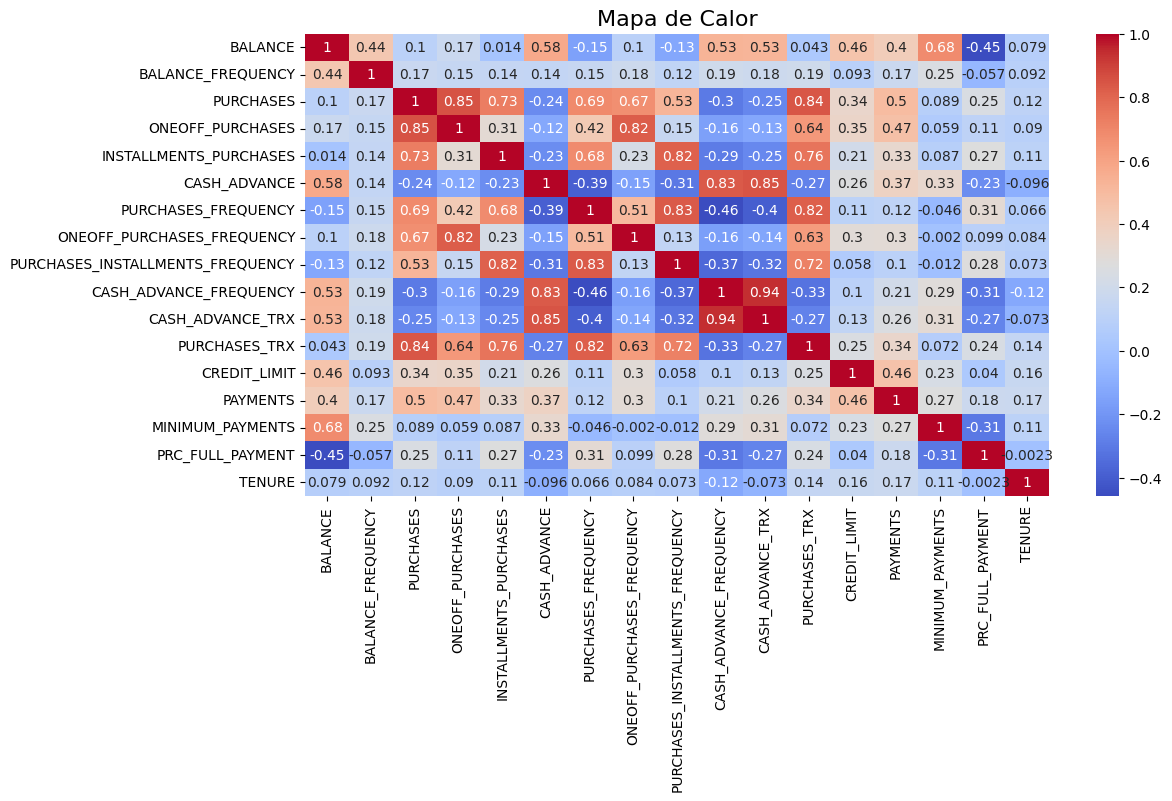

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Mapa de Calor',fontsize=16)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
df=ss.fit_transform(df)
pca=PCA()
pca.fit(df)
PCA()

PCA()

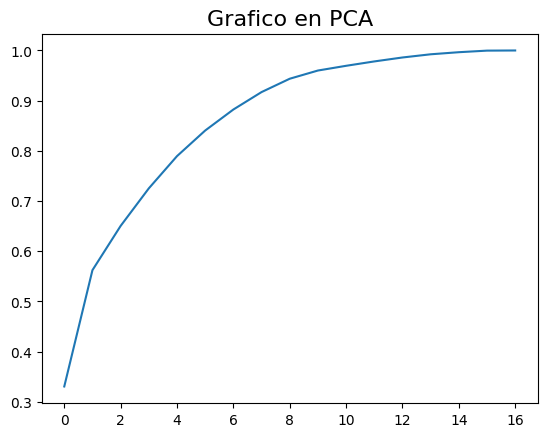

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Grafico en PCA',fontsize=16)
plt.show()

In [ ]:
pca=PCA(n_components=6)
x=pca.fit_transform(df)

## **KMENAS CLUSTERING**

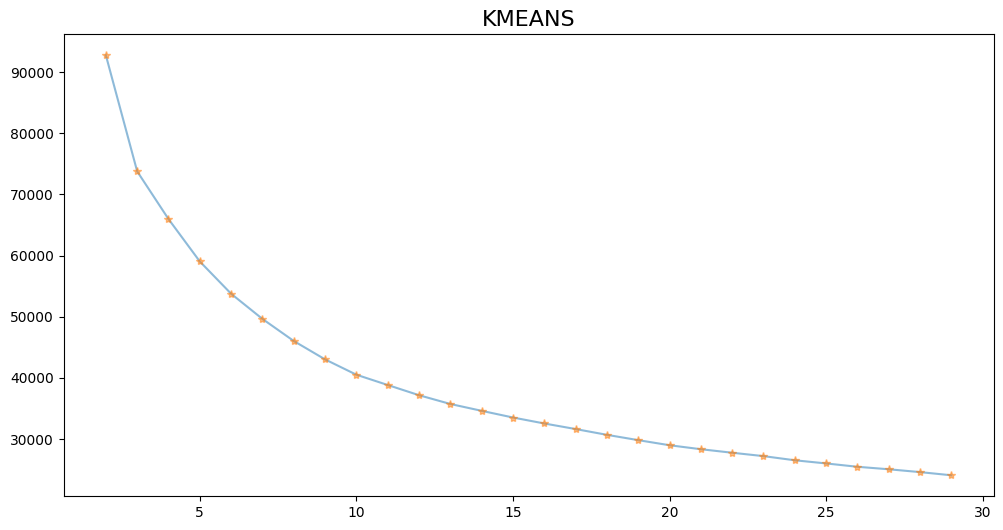

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.figure(figsize=(12,6))
distortions=[]
sil_scores=[]
for i in range(2,30):
  kmeans= KMeans(n_clusters=i, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
  kmeans.fit(x)
  distortions.append(kmeans.inertia_)
  label=kmeans.labels_
  sil_scores.append(silhouette_score(x,label))
plt.plot(np.arange(2,30,1),distortions,alpha=0.5)
plt.plot(np.arange(2,30,1),distortions,'*',alpha=0.50)
plt.title('KMEANS',fontsize=16)
plt.show()

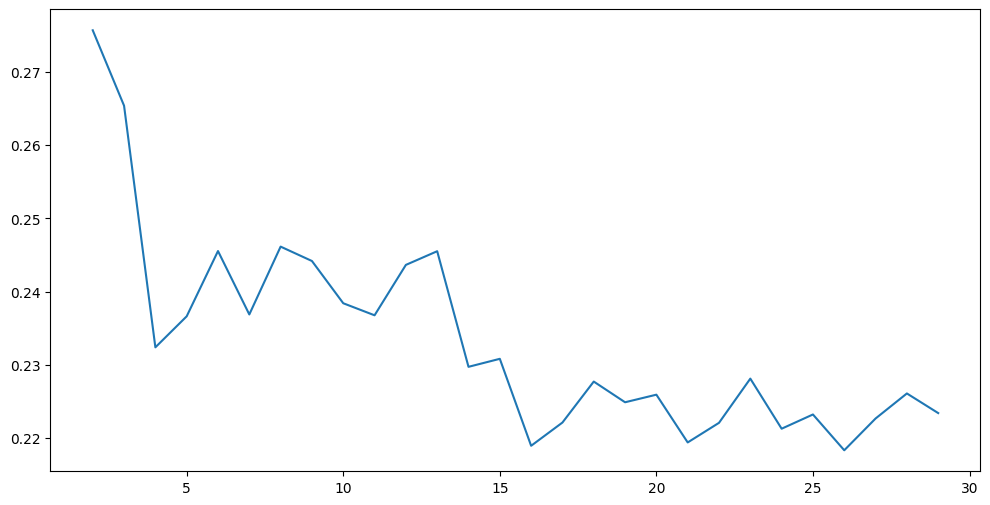

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(2,30,1),sil_scores)
plt.show()

### **Numero de CLUSETERS 5**

In [ ]:
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(x)
labels= kmeans.labels_

In [ ]:
df

array([[-1.07820684, -0.09750658, -0.59702068, ..., -0.64488138,
        -0.63623175,  0.35334418],
       [ 1.05351   ,  0.19028849, -1.04245862, ...,  0.54587004,
         0.78877679,  0.35334418],
       [ 0.77156511,  0.46401899,  0.22563265, ...,  0.10785519,
        -0.63623175,  0.35334418],
       ...,
       [-1.14437957, -0.04847104, -0.49443836, ..., -0.80032727,
         0.87521881, -4.28074194],
       [-1.19401541, -0.04847104, -1.04245862, ..., -0.89198546,
         0.87521881, -4.28074194],
       [-0.5299237 , -0.61533798,  0.46544213, ..., -0.78225349,
        -0.63623175, -4.28074194]])

In [ ]:
pca=PCA(n_components=2)
x2=pca.fit_transform(df)
pca_df=pd.DataFrame(data=x2,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.893102,-2.470296
1,-2.997217,2.030084
2,1.191889,0.386961
3,-0.771674,0.015638
4,-1.271139,-1.578251


In [ ]:
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-0.893102,-2.470296,4
1,-2.997217,2.030084,1
2,1.191889,0.386961,4
3,-0.771674,0.015638,4
4,-1.271139,-1.578251,4


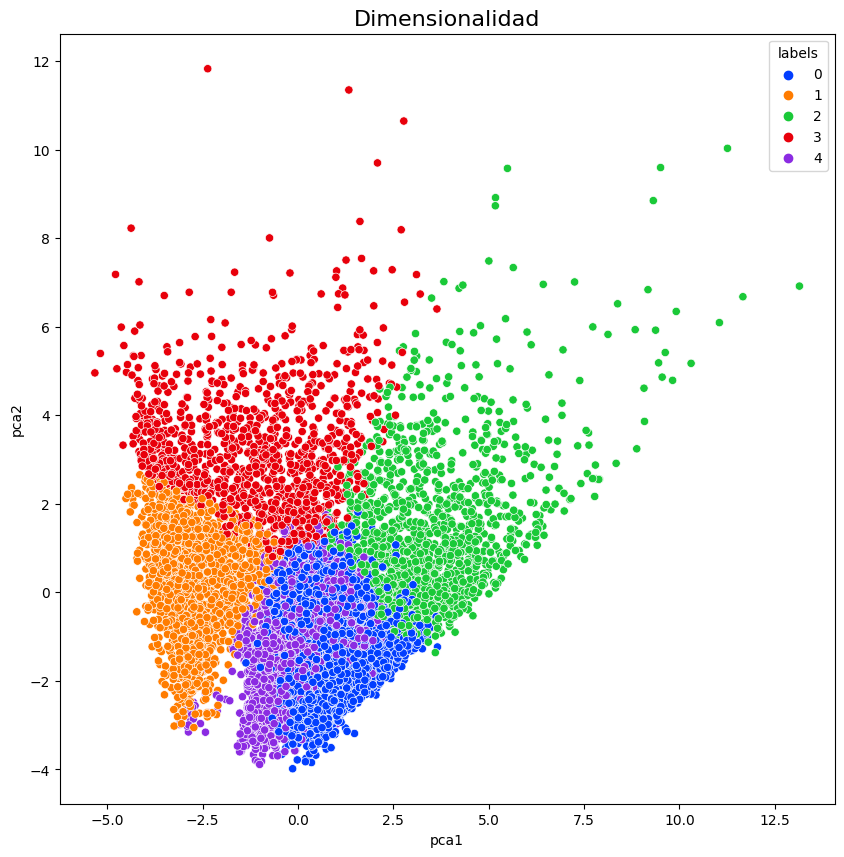

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')
plt.title('Dimensionalidad',fontsize=16)
plt.show()

### **NUMERO DE CLUSTERS 3**

In [ ]:
kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(x)
labels= kmeans.labels_

In [ ]:
pca=PCA(n_components=2)
x2=pca.fit_transform(df)

In [ ]:
pca_df=pd.DataFrame(data=x2,columns=['pca1','pca2'])
pca_df['labels']=labels
pca_df.head()

,pca1,pca2,labels
0,-0.893102,-2.470296,1
1,-2.997217,2.030083,0
2,1.191889,0.386961,2
3,-0.771674,0.015639,0
4,-1.271139,-1.578252,1


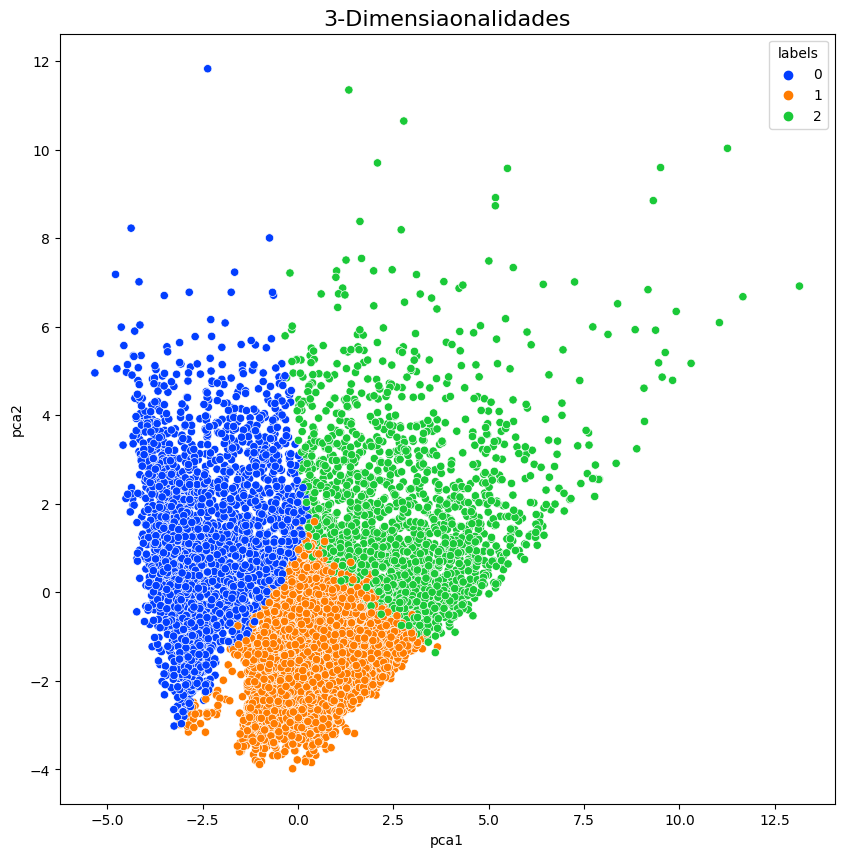

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')
plt.title('3-Dimensiaonalidades',fontsize=16)
plt.show()